In [1]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV
from matplotlib import pyplot

pyplot.style.use('default') # para graficos matplotlib
pyplot.rcParams['figure.figsize'] = (10, 8)


from sklearn import metrics
from sklearn.model_selection import train_test_split
pd.set_option('display.float_format', lambda x: '%.5f' % x)


# pd.options.display.float_format = '{:20,.0f}'.format # suprimimos la notacion cientifica en los outputs

In [2]:
path = 'data/'
features = pd.read_csv(path + 'features.csv')
test = pd.read_csv(path + 'testModified.csv')

In [3]:
x = features.drop(['precio'],1)
y = features['precio']

In [4]:
TUNING  = False

In [5]:
min_samples_split = [10,20,30] # Numero minimo de muestras para splitear nodo
min_samples_leaf = [4,6,8] # Numero minimo de muestras requeridas en cada nodo hoja
bootstrap = [True, False] # Metodo seleccion muestras para entrenar cada arbol
random_grid = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
                 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
                 "min_child_weight" : [ 1, 3, 5, 7 ],
                 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
                 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
                 "subsample" : [0.5,0.6,0.7,0.8,0.9,1],
                 "colsample_bytree" : [0.5,0.6,0.7,0.8,0.9,1],
                 "n_estimators" : [100,200,300,400,500],
              }

In [6]:
tst_sz = 0.3
seed = 139
if (TUNING):
    x, y = shuffle(x, y, random_state=seed)
    cat = CatBoostRegressor(njobs=-1)
    cat_random = RandomizedSearchCV(estimator = cat, param_distributions = random_grid, n_iter = 15, cv = 5, verbose=100, random_state=42, n_jobs=-1, return_train_score=True)
    cat_random.fit(x,y)
else:
#     x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=tst_sz,random_state=seed)
    x, y = shuffle(x, y, random_state=seed)
    model = CatBoostRegressor(iterations= 1000,depth=10, random_seed=seed)
    scoring = {'abs_error': 'neg_mean_absolute_error'}
    scores = cross_validate(model, x, y, cv=5, scoring=scoring, return_train_score=True, verbose=30, n_jobs=-1)
    print("MAE :", abs(scores['test_abs_error'].mean()))
    print('Fitting...')
    model.fit(x,y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  5.1min remaining:  7.7min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  5.1min remaining:  3.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  6.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  6.7min finished


MAE : 609520.833970519
Fitting...
0:	learn: 2111042.8596943	total: 149ms	remaining: 2m 28s
1:	learn: 2070886.3611788	total: 232ms	remaining: 1m 55s
2:	learn: 2032284.1144441	total: 314ms	remaining: 1m 44s
3:	learn: 1995159.1151682	total: 403ms	remaining: 1m 40s
4:	learn: 1959159.5042730	total: 488ms	remaining: 1m 37s
5:	learn: 1924746.1354382	total: 569ms	remaining: 1m 34s
6:	learn: 1891634.8674738	total: 653ms	remaining: 1m 32s
7:	learn: 1860249.1194689	total: 735ms	remaining: 1m 31s
8:	learn: 1829819.0935171	total: 815ms	remaining: 1m 29s
9:	learn: 1800403.4120580	total: 899ms	remaining: 1m 28s
10:	learn: 1772331.0814508	total: 981ms	remaining: 1m 28s
11:	learn: 1744926.4148202	total: 1.06s	remaining: 1m 27s
12:	learn: 1719053.5760663	total: 1.15s	remaining: 1m 27s
13:	learn: 1693693.7980684	total: 1.23s	remaining: 1m 26s
14:	learn: 1669632.6084261	total: 1.32s	remaining: 1m 26s
15:	learn: 1646453.7426438	total: 1.42s	remaining: 1m 27s
16:	learn: 1624203.1648780	total: 1.51s	remainin

In [7]:
if (TUNING):
    print(cat_random.best_params_)
    print(cat_random.best_score_)
    model = cat_random.best_estimator_

Index(['valor m2 ciudad', 'metroscubiertos', 'metrostotales', 'banos',
       'valor m2 tipodepropiedad', 'antiguedad', 'period', 'garages',
       'poblacion', 'Valor dolar', 'habitaciones', 'Casa', 'Terreno',
       'Apartamento', 'piscina', 'Centrosur', 'gimnasio',
       'centroscomercialescercanos', 'Noreste', 'escuelascercanas', 'Sureste',
       'Centronorte', 'Este', 'Terreno comercial', 'Oeste', 'Edificio',
       'Casa en condominio', 'usosmultiples', 'Suroeste', 'Bodega comercial',
       'Local Comercial', 'Noroeste', 'Oficina comercial',
       'Inmuebles productivos urbanos', 'Quinta Vacacional', 'Nave industrial',
       'Terreno industrial', 'Villa', 'Otros', 'Rancho', 'Casa uso de suelo',
       'Huerta', 'Duplex', 'Departamento Compartido',
       'Local en centro comercial'],
      dtype='object', name='feature')


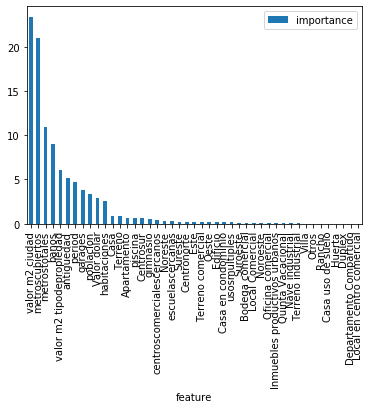

In [8]:
df = pd.DataFrame({'feature':x.columns, 'importance':model.feature_importances_})
df = df.set_index('feature')
df = df.sort_values(by='importance', ascending=False)
print(df.index)  
df.plot(kind='bar')

In [9]:
cat_predict = model.predict(test.drop(['id'], axis=1))
res = pd.DataFrame(cat_predict, index=test.id, columns=['precio'])
res = res.rename({'precio':'target'}, axis=1)
res.to_csv("predictions/cat_predictions.csv", header = True)